Aspects to Find:
- Mean area of the fires ✅
- Median area of the fire ✅
- Location of the fire (unit) ✅
- Number of days it takes to supress the fire an average
- Causes ✅
- Number of fires per year ✅
- Mean number of fires per year ✅
- Median number of fires per year ✅

In [65]:
#Setting up
import pandas as pd
import os
import csv
import datetime
import matplotlib.pyplot as plt
os.system('clear')
fireData = pd.read_csv("californiaFiresDataset.csv")
print(fireData)

       OBJECTID   YEAR_ STATE AGENCY UNIT_ID     FIRE_NAME INC_NUM  \
0         21440  2020.0    CA    CDF     NEU        NELSON   13212   
1         21441  2020.0    CA    CDF     NEU       AMORUSO   11799   
2         21442  2020.0    CA    CDF     NEU        ATHENS   18493   
3         21443  2020.0    CA    CDF     NEU       FLEMING    7619   
4         21444  2020.0    CA    CDF     NEU      MELANESE    8471   
...         ...     ...   ...    ...     ...           ...     ...   
21313     42760  2019.0    CA    CCO     LAC        MUREAU     NaN   
21314     42761  2019.0    CA    LRA     NaN           OAK     NaN   
21315     42762  2019.0    CA    LRA     LDF        BARHAM     845   
21316     42763  2019.0    CA    NPS     MNP          STAR   13598   
21317     42764  2019.0    CA    LRA     LDF  SADDLE RIDGE    1582   

                   ALARM_DATE               CONT_DATE  \
0      2020/06/18 00:00:00+00  2020/06/23 00:00:00+00   
1      2020/06/01 00:00:00+00  2020/06/04 00:

Location of the fires (unit)

In [66]:
print(fireData.groupby('UNIT_ID').UNIT_ID.count())

UNIT_ID
         2
AEU    198
AFV    111
ANF    503
APF      1
      ... 
TUU    157
VLJ      1
VNC    403
WED      1
YNP    472
Name: UNIT_ID, Length: 90, dtype: int64


Mean area of the fires

In [67]:
print("The mean area of the fires in California is " + str(abs(fireData.SHAPE_Area.mean())))

The mean area of the fires in California is 12113522.155459156


Number of fires per year

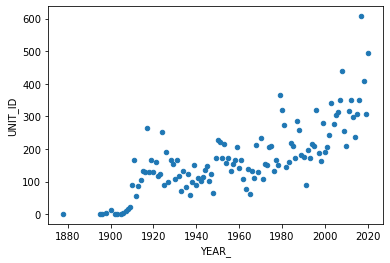

In [68]:
#Create a new dataframe for just the data that's relevant
firesPerYear = pd.DataFrame(fireData.groupby('YEAR_').UNIT_ID.count())
firesPerYear.to_csv("fireTesting.csv") #For testing purposes
#Fix the data so that it's in readable form to plot
firesPerYear.reset_index(inplace = True, drop = False)
#print(firesPerYear)
#Plot the data
firesPerYear.plot.scatter(x = 'YEAR_', y = 'UNIT_ID')
plt.show()

Average Number of Fires Per Year

In [69]:
print(abs(firesPerYear.UNIT_ID.mean()))

172.52032520325204


Median Number of Fires Per Year

In [70]:
print(abs(firesPerYear.UNIT_ID.median()))

160.0


Median Area of the fires

In [71]:
print("The median area of the fires in California is " + str(abs(fireData.SHAPE_Area.median())))

The median area of the fires in California is 1023914.7435


Causes of the fires

                            CAUSE  UNIT_ID
0                   1 - Lightning     3453
1                    10 - Vehicle      454
2                  11 - Powerline      410
3       12 - Firefighter Training        5
4   13 - Non-Firefighter Training       11
5      14 - Unkown / Unidentified     9535
6                  15 - Structure       21
7                   16 - Aircraft       14
8    18 - Escaped Prescribed Burn       90
9     19 - Illegal Alien Campfire       17
10              2 - Equipment Use     1246
11                    3 - Infared      342
12                   4 - Campfire      380
13                     5 - Debris      723
14                 6 - Hand Drawn       80
15                      7 - Arson      902
16          8 - Playing with fire      196
17              9 - Miscellaneous     3375


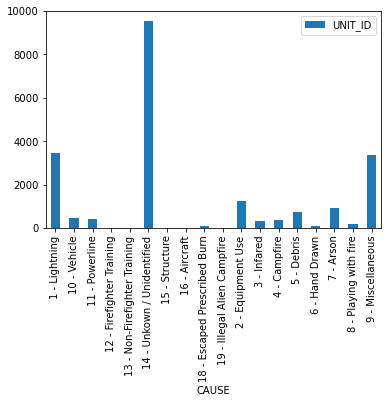

In [72]:
#Create a new dataframe with the relevant data
fireCauses = pd.DataFrame(fireData.groupby('CAUSE').UNIT_ID.count())
#print(fireCauses)
#Make the data readable and ready to plot
fireCauses.reset_index(inplace = True, drop = False)
print(fireCauses)
#Plot the data
fireCauses.plot.bar(x = 'CAUSE', y = 'UNIT_ID')

plt.show()

Subtract the Dates

In [73]:
#Trying to do this with the help of Stackoverflow

# df = pd.read_csv("californiaFiresDataset.csv")

# df['ALARM_DATE'] = pd.to_datetime(df['ALARM_DATE'])
# df['CONT_DATE'] = pd.to_datetime(df['CONT_DATE'])

# df['CONT_DATE'] - df['ALARM_DATE']

# fireDataWithDates['ALARM_DATE'] = pd.to_datetime(fireDataWithDates['ALARM_DATE'])
# fireDataWithDates['CONT_DATE'] = pd.to_datetime(fireDataWithDates['CONT_DATE'])

#fireDataWithDates['NumberOfDays'] = fireDataWithDates['CONT_DATE'] - fireDataWithDates['ALARM_DATE']

#fireDataWithDates[['ALARM_DATE', 'CONT_DATE']] = fireDataWithDates[['ALARM_DATE', 'CONT_DATE']].apply(pd.to_datetime)
#fireDataWithDates['NumberOfDays'] = fireDataWithDates['CONT_DATE'] - fireDataWithDates['ALARM_DATE']
#fireDataWithDates['CONT_DATE'] - fireDataWithDates['ALARM_DATE']



OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 219-05-29 00:00:00

______________________________________________________________________________________________
Question to answer:
Which fire departments in California require new and different kinds of training based on the number of fires they receive, how long it takes, on average, to extinguish the fires, and the causes of the fires?

Total number of fires per unit:

In [ ]:
fireLocations = pd.DataFrame(fireData.groupby('UNIT_ID').UNIT_ID.count())
#print(fireLocations)

#Delete the rows with values of less than 50. We need to ensure that there's enough data to go off of
fireLocations.drop(fireLocations.index[fireLocations['UNIT_ID']<10],inplace=True)

print(fireLocations)